In [12]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np



In [23]:
df_steam1=pd.read_csv('steam/players.csv')
df_steam1.head()


,playerid,country,created
0,76561198287452552,Brazil,2016-03-02 06:14:20
1,76561198040436563,Israel,2011-04-10 17:10:06
2,76561198049686270,NaN,2011-09-28 21:43:59
3,76561198155814250,Kazakhstan,2014-09-24 19:52:47
4,76561198119605821,NaN,2013-12-26 00:25:50


In [24]:
df_steam1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 424683 entries, 0 to 424682
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   playerid  424683 non-null  int64 
 1   country   246815 non-null  object
 2   created   377014 non-null  object
dtypes: int64(1), object(2)
memory usage: 9.7+ MB


In [27]:
df_steam1["country"].unique()

array(['Brazil', 'Israel', nan, 'Kazakhstan', 'Russian Federation',
       'Madagascar', 'Australia', 'Ukraine', 'United States', 'Finland',
       'China', 'Latvia', 'Canada', 'India', 'Italy', 'Poland', 'Japan',
       'Portugal', 'Taiwan, Province of China', 'Austria', 'Germany',
       'Czechia', 'Mexico', 'Denmark', 'South Africa', 'Spain',
       'Netherlands', 'Croatia', 'Türkiye', 'Greece', 'United Kingdom',
       'Serbia', 'Christmas Island', 'Thailand', 'France',
       'Korea, Republic of', 'Niger', 'Heard Island and McDonald Islands',
       'Argentina', 'Palestine, State of', 'Western Sahara', 'Bulgaria',
       'Switzerland', 'Kyrgyzstan', 'Malta', 'Estonia', 'Armenia',
       'Sweden', 'Belarus', 'Afghanistan', 'Ireland', 'Norway', 'Romania',
       'Hong Kong', "Korea, Democratic People's Republic of", 'Sri Lanka',
       'Malaysia', 'Colombia', 'Iran, Islamic Republic of', 'Belgium',
       'Fiji', 'Cuba', 'Nauru', 'Iceland', 'Svalbard and Jan Mayen',
       'Egypt', 

In [28]:
df_steam1.isnull().sum()

playerid         0
country     177868
created      47669
dtype: int64

In [29]:
df_steam1["created"] = pd.to_datetime(df_steam1["created"])

In [30]:
df_steam1=df_steam1["created"].dropna()

In [38]:
df_steam1.max()

Timestamp('2025-01-07 19:57:59')

Toplam kayıt sayısı: 424,683
Ülke bilgisi olmayan (NaN) kayıt sayısı: 177,868
NaN yüzdesi: %41.88


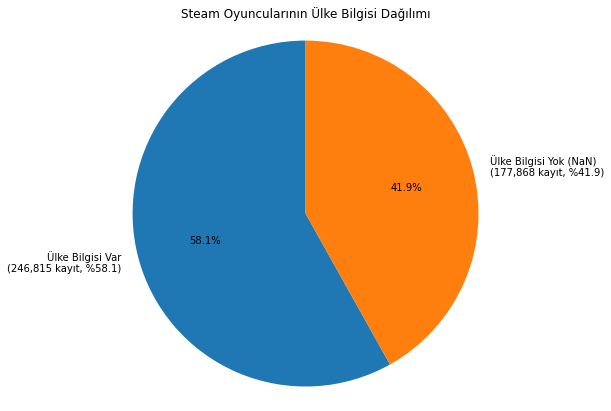

In [39]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Oyuncuları okuyalım
players_df = pd.read_csv('steam/players.csv')

# NaN veri sayısını hesaplayalım
nan_count = players_df['country'].isna().sum()
total_records = len(players_df)
nan_percentage = (nan_count / total_records) * 100

print(f"Toplam kayıt sayısı: {total_records:,}")
print(f"Ülke bilgisi olmayan (NaN) kayıt sayısı: {nan_count:,}")
print(f"NaN yüzdesi: %{nan_percentage:.2f}")

# Pasta grafik için veri hazırlayalım
labels = ['Ülke Bilgisi Var', 'Ülke Bilgisi Yok (NaN)']
sizes = [total_records - nan_count, nan_count]
percentages = [100 - nan_percentage, nan_percentage]

# Pasta grafiği çizelim
plt.figure(figsize=(10, 7))
plt.pie(sizes, labels=[f'{labels[0]}\n({sizes[0]:,} kayıt, %{percentages[0]:.1f})', 
                      f'{labels[1]}\n({sizes[1]:,} kayıt, %{percentages[1]:.1f})'],
        autopct='%1.1f%%', startangle=90)
plt.title('Steam Oyuncularının Ülke Bilgisi Dağılımı')
plt.axis('equal')
plt.show()

In [41]:
players_df.head()

,playerid,country,created
0,76561198287452552,Brazil,2016-03-02 06:14:20
1,76561198040436563,Israel,2011-04-10 17:10:06
3,76561198155814250,Kazakhstan,2014-09-24 19:52:47
5,76561198083492916,Russian Federation,2013-02-09 04:05:02
6,76561198150634683,Madagascar,2014-08-19 01:49:11


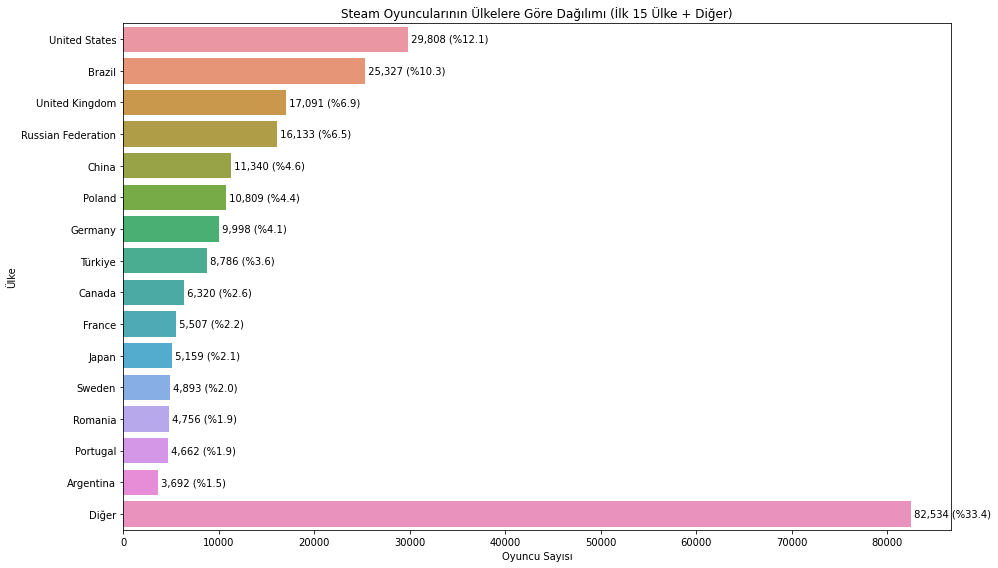


Ülkelere göre oyuncu sayıları ve yüzdeleri:
United States: 29,808 oyuncu (%12.1)
Brazil: 25,327 oyuncu (%10.3)
United Kingdom: 17,091 oyuncu (%6.9)
Russian Federation: 16,133 oyuncu (%6.5)
China: 11,340 oyuncu (%4.6)
Poland: 10,809 oyuncu (%4.4)
Germany: 9,998 oyuncu (%4.1)
Türkiye: 8,786 oyuncu (%3.6)
Canada: 6,320 oyuncu (%2.6)
France: 5,507 oyuncu (%2.2)
Japan: 5,159 oyuncu (%2.1)
Sweden: 4,893 oyuncu (%2.0)
Romania: 4,756 oyuncu (%1.9)
Portugal: 4,662 oyuncu (%1.9)
Argentina: 3,692 oyuncu (%1.5)
Diğer: 82,534 oyuncu (%33.4)

Toplam oyuncu sayısı: 246,815
Toplam ülke sayısı: 249

Diğer kategorisindeki detaylar:
- Ülke sayısı: 234 ülke
- Toplam oyuncu: 82,534 oyuncu

Diğer kategorisindeki ülkeler ve oyuncu sayıları (ilk 10):
Australia: 3,597 oyuncu (%1.46)
Denmark: 3,452 oyuncu (%1.40)
Spain: 3,199 oyuncu (%1.30)
Ukraine: 3,191 oyuncu (%1.29)
Netherlands: 2,800 oyuncu (%1.13)
Norway: 2,484 oyuncu (%1.01)
Indonesia: 2,454 oyuncu (%0.99)
India: 2,445 oyuncu (%0.99)
Italy: 2,360 oyuncu

In [40]:


# Boş ülke değerlerini çıkaralım
players_df = players_df.dropna(subset=['country'])

# Toplam oyuncu sayısı
total_players = len(players_df)

# Tüm ülkelerin sayılarını alalım
country_counts = players_df['country'].value_counts()

# İlk 15 ülkeyi alalım
top_15_countries = country_counts[:15]
other_players = country_counts[15:].sum()
other_countries_count = len(country_counts[15:])  # Diğer kategorisindeki ülke sayısı

# İlk 15 ülke ve diğerleri
final_data = pd.concat([top_15_countries, pd.Series({'Diğer': other_players})])

# Grafiği çizelim
plt.figure(figsize=(14, 8))
bars = sns.barplot(x=final_data.values, y=final_data.index)

plt.title('Steam Oyuncularının Ülkelere Göre Dağılımı (İlk 15 Ülke + Diğer)')
plt.xlabel('Oyuncu Sayısı')
plt.ylabel('Ülke')

# Sayıları ve yüzdeleri bar'ların üzerine ekleyelim
for i, v in enumerate(final_data.values):
    percentage = (v / total_players) * 100
    plt.text(v, i, f' {v:,} (%{percentage:.1f})', va='center')

plt.tight_layout()
plt.show()

# Sayısal verileri gösterelim
print("\nÜlkelere göre oyuncu sayıları ve yüzdeleri:")
for country, count in final_data.items():
    percentage = (count / total_players) * 100
    print(f"{country}: {count:,} oyuncu (%{percentage:.1f})")

print(f"\nToplam oyuncu sayısı: {total_players:,}")
print(f"Toplam ülke sayısı: {len(country_counts):,}")
print(f"\nDiğer kategorisindeki detaylar:")
print(f"- Ülke sayısı: {other_countries_count:,} ülke")
print(f"- Toplam oyuncu: {other_players:,} oyuncu")
print("\nDiğer kategorisindeki ülkeler ve oyuncu sayıları (ilk 10):")
for country, count in country_counts[15:25].items():
    percentage = (count / total_players) * 100
    print(f"{country}: {count:,} oyuncu (%{percentage:.2f})")

In [42]:
players_df_ps = pd.read_csv('playstation/players.csv')
players_df_ps.head()

,playerid,nickname,country
0,2744567,ieizazuBisnorog,Croatia
1,328452,DiscoGitaroo,United States
2,2521482,Ectivey,United Kingdom
3,390175,Tomie_Again,"Korea, Republic of"
4,4348945,Lordhell1986,Russian Federation


In [43]:
players_df_ps.isnull().sum()

playerid    0
nickname    0
country     0
dtype: int64

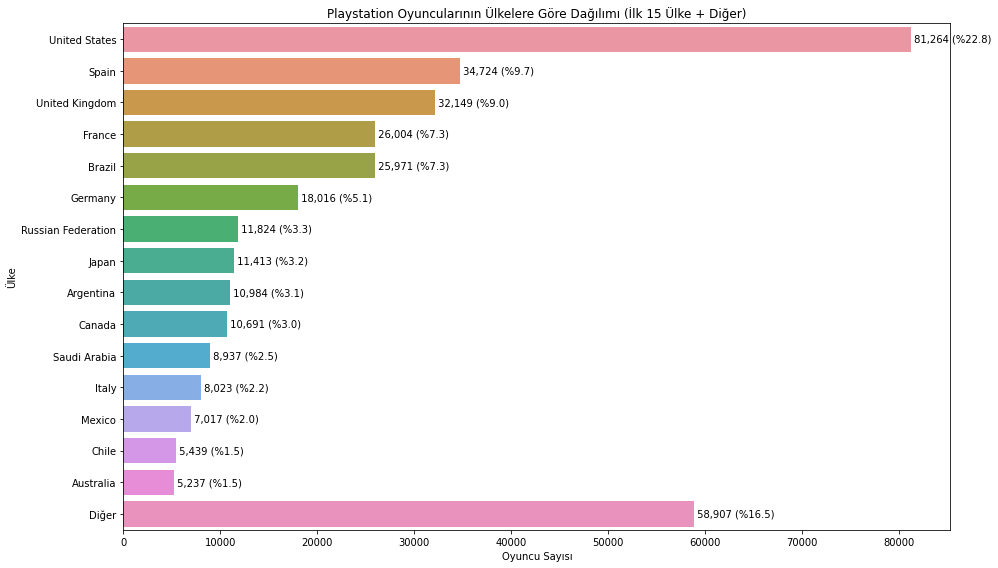


Ülkelere göre oyuncu sayıları ve yüzdeleri:
United States: 81,264 oyuncu (%22.8)
Spain: 34,724 oyuncu (%9.7)
United Kingdom: 32,149 oyuncu (%9.0)
France: 26,004 oyuncu (%7.3)
Brazil: 25,971 oyuncu (%7.3)
Germany: 18,016 oyuncu (%5.1)
Russian Federation: 11,824 oyuncu (%3.3)
Japan: 11,413 oyuncu (%3.2)
Argentina: 10,984 oyuncu (%3.1)
Canada: 10,691 oyuncu (%3.0)
Saudi Arabia: 8,937 oyuncu (%2.5)
Italy: 8,023 oyuncu (%2.2)
Mexico: 7,017 oyuncu (%2.0)
Chile: 5,439 oyuncu (%1.5)
Australia: 5,237 oyuncu (%1.5)
Diğer: 58,907 oyuncu (%16.5)

Toplam oyuncu sayısı: 356,600
Toplam ülke sayısı: 70

Diğer kategorisindeki detaylar:
- Ülke sayısı: 55 ülke
- Toplam oyuncu: 58,907 oyuncu

Diğer kategorisindeki ülkeler ve oyuncu sayıları (ilk 10):
Poland: 5,062 oyuncu (%1.42)
Hong Kong: 4,886 oyuncu (%1.37)
Netherlands: 4,181 oyuncu (%1.17)
Belgium: 4,122 oyuncu (%1.16)
Portugal: 4,059 oyuncu (%1.14)
Sweden: 2,119 oyuncu (%0.59)
Finland: 1,878 oyuncu (%0.53)
Ireland: 1,865 oyuncu (%0.52)
Colombia: 1,8

In [44]:




# Toplam oyuncu sayısı
total_players_ps = len(players_df_ps)

# Tüm ülkelerin sayılarını alalım
country_counts_ps = players_df_ps['country'].value_counts()

# İlk 15 ülkeyi alalım
top_15_countries_ps = country_counts_ps[:15]
other_players_ps = country_counts_ps[15:].sum()
other_countries_count_ps = len(country_counts_ps[15:])  # Diğer kategorisindeki ülke sayısı

# İlk 15 ülke ve diğerleri
final_data_ps = pd.concat([top_15_countries_ps, pd.Series({'Diğer': other_players_ps})])

# Grafiği çizelim
plt.figure(figsize=(14, 8))
bars = sns.barplot(x=final_data_ps.values, y=final_data_ps.index)

plt.title('Playstation Oyuncularının Ülkelere Göre Dağılımı (İlk 15 Ülke + Diğer)')
plt.xlabel('Oyuncu Sayısı')
plt.ylabel('Ülke')

# Sayıları ve yüzdeleri bar'ların üzerine ekleyelim
for i, v in enumerate(final_data_ps.values):
    percentage = (v / total_players_ps) * 100
    plt.text(v, i, f' {v:,} (%{percentage:.1f})', va='center')

plt.tight_layout()
plt.show()

# Sayısal verileri gösterelim
print("\nÜlkelere göre oyuncu sayıları ve yüzdeleri:")
for country, count in final_data_ps.items():
    percentage = (count / total_players_ps) * 100
    print(f"{country}: {count:,} oyuncu (%{percentage:.1f})")

print(f"\nToplam oyuncu sayısı: {total_players_ps:,}")
print(f"Toplam ülke sayısı: {len(country_counts_ps):,}")
print(f"\nDiğer kategorisindeki detaylar:")
print(f"- Ülke sayısı: {other_countries_count_ps:,} ülke")
print(f"- Toplam oyuncu: {other_players_ps:,} oyuncu")
print("\nDiğer kategorisindeki ülkeler ve oyuncu sayıları (ilk 10):")
for country, count in country_counts_ps[15:25].items():
    percentage = (count / total_players_ps) * 100
    print(f"{country}: {count:,} oyuncu (%{percentage:.2f})")

In [45]:
players_df_steam_para = pd.read_csv('steam/prices.csv')
players_df_steam_para = players_df_steam_para[['usd']]
players_df_steam_para=players_df_steam_para.dropna()
players_df_steam_para.head()
print(players_df_steam_para.describe().T)

print("Steam Platform Para Toplam Harcama: ",players_df_steam_para.sum())


         count      mean        std   min   25%   50%   75%     max
usd  3507125.0  8.144524  14.122041  0.49  1.99  4.99  9.99  999.98
Steam Platform Para Toplam Harcama:  usd    28563865.01
dtype: float64


In [46]:
players_df_playstation = pd.read_csv('playstation/prices.csv')
players_df_playstation = players_df_playstation[['usd']]
players_df_playstation = players_df_playstation.dropna()
players_df_playstation.head()
print(players_df_playstation.describe().T)

print("PlayStation Platform Para Toplam Harcama: ",players_df_playstation.sum())

       count       mean        std   min   25%   50%    75%    max
usd  49251.0  12.069886  11.978001  0.02  2.99  7.99  17.99  99.99
PlayStation Platform Para Toplam Harcama:  usd    594453.98
dtype: float64


In [47]:
players_df_xbox = pd.read_csv('xbox/prices.csv')
players_df_xbox = players_df_xbox[['usd']]
players_df_xbox = players_df_xbox.dropna()
players_df_xbox.head()
print(players_df_xbox.describe().T)

print("Xbox Platform Para Toplam Harcama: ",players_df_xbox.sum())

       count       mean        std   min   25%    50%    75%     max
usd  16003.0  17.143737  12.373122  0.98  7.99  14.99  19.99  109.99
Xbox Platform Para Toplam Harcama:  usd    274351.23
dtype: float64


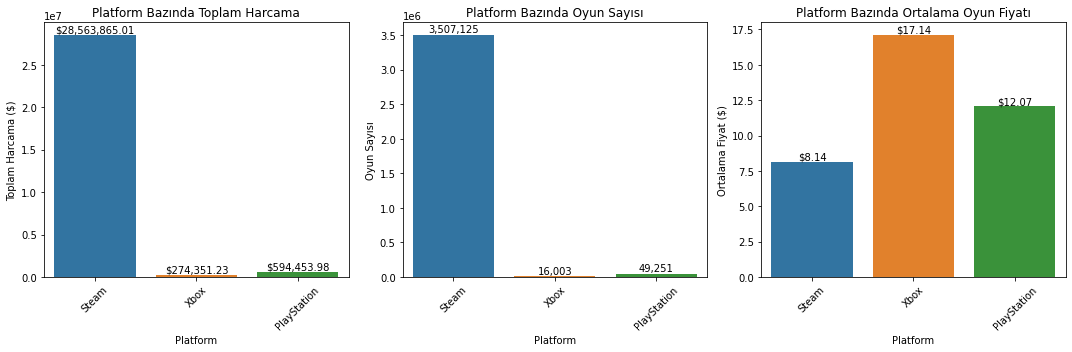

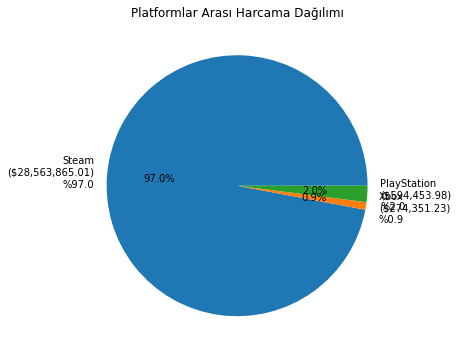


Platform İstatistikleri:
--------------------------------------------------------------------------------

Steam:
Toplam Harcama: $28,563,865.01
Oyun Sayısı: 3,507,125
Ortalama Oyun Fiyatı: $8.14
Toplam Harcamadaki Pay: %97.0

Xbox:
Toplam Harcama: $274,351.23
Oyun Sayısı: 16,003
Ortalama Oyun Fiyatı: $17.14
Toplam Harcamadaki Pay: %0.9

PlayStation:
Toplam Harcama: $594,453.98
Oyun Sayısı: 49,251
Ortalama Oyun Fiyatı: $12.07
Toplam Harcamadaki Pay: %2.0

Tüm Platformlar Toplam Harcama: $29,432,670.22


In [48]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Platformların verilerini okuyalım
steam_df = pd.read_csv('steam/prices.csv')
xbox_df = pd.read_csv('xbox/prices.csv')
playstation_df = pd.read_csv('playstation/prices.csv')

# Her platform için USD cinsinden toplam harcamayı hesaplayalım
def calculate_platform_stats(df, platform_name):
    # NaN değerleri çıkar ve USD cinsinden toplam harcama
    total_spent = df['usd'].dropna().sum()
    game_count = len(df['usd'].dropna())
    avg_price = total_spent / game_count if game_count > 0 else 0
    return {
        'Platform': platform_name,
        'Toplam Harcama ($)': total_spent,
        'Oyun Sayısı': game_count,
        'Ortalama Fiyat ($)': avg_price
    }

# Her platform için istatistikleri hesaplayalım
platforms_stats = pd.DataFrame([
    calculate_platform_stats(steam_df, 'Steam'),
    calculate_platform_stats(xbox_df, 'Xbox'),
    calculate_platform_stats(playstation_df, 'PlayStation')
])

# 1. Her platform için ayrı grafik
plt.figure(figsize=(15, 5))

# Toplam Harcama
plt.subplot(131)
sns.barplot(x='Platform', y='Toplam Harcama ($)', data=platforms_stats)
plt.title('Platform Bazında Toplam Harcama')
plt.xticks(rotation=45)
for i, v in enumerate(platforms_stats['Toplam Harcama ($)']):
    plt.text(i, v, f'${v:,.2f}', ha='center', va='bottom')

# Oyun Sayısı
plt.subplot(132)
sns.barplot(x='Platform', y='Oyun Sayısı', data=platforms_stats)
plt.title('Platform Bazında Oyun Sayısı')
plt.xticks(rotation=45)
for i, v in enumerate(platforms_stats['Oyun Sayısı']):
    plt.text(i, v, f'{v:,}', ha='center', va='bottom')

# Ortalama Fiyat
plt.subplot(133)
sns.barplot(x='Platform', y='Ortalama Fiyat ($)', data=platforms_stats)
plt.title('Platform Bazında Ortalama Oyun Fiyatı')
plt.xticks(rotation=45)
for i, v in enumerate(platforms_stats['Ortalama Fiyat ($)']):
    plt.text(i, v, f'${v:.2f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()

# 2. Karşılaştırmalı yüzde grafik
plt.figure(figsize=(10, 6))
total_spending = platforms_stats['Toplam Harcama ($)'].sum()
platforms_stats['Harcama Yüzdesi'] = platforms_stats['Toplam Harcama ($)'] / total_spending * 100

plt.pie(platforms_stats['Toplam Harcama ($)'], 
        labels=[f"{row['Platform']}\n(${row['Toplam Harcama ($)']:,.2f})\n%{row['Harcama Yüzdesi']:.1f}" 
                for _, row in platforms_stats.iterrows()],
        autopct='%1.1f%%')
plt.title('Platformlar Arası Harcama Dağılımı')
plt.show()

# Detaylı istatistikleri yazdıralım
print("\nPlatform İstatistikleri:")
print("-" * 80)
for _, row in platforms_stats.iterrows():
    print(f"\n{row['Platform']}:")
    print(f"Toplam Harcama: ${row['Toplam Harcama ($)']:,.2f}")
    print(f"Oyun Sayısı: {row['Oyun Sayısı']:,}")
    print(f"Ortalama Oyun Fiyatı: ${row['Ortalama Fiyat ($)']:.2f}")
    print(f"Toplam Harcamadaki Pay: %{row['Harcama Yüzdesi']:.1f}")

print(f"\nTüm Platformlar Toplam Harcama: ${total_spending:,.2f}")